In [ ]:
!unzip Images.zip 

In [ ]:
!unzip Airplanes_Annotations.zip

In [7]:
!mkdir /content/Airplanes_Annotations_resized
!mkdir /content/Images_resized

In [ ]:
import shutil
import os
c=0
for image in os.listdir("/content/Images"):
  c+=1
  shutil.move("/content/Images/"+image , "/content/Images_resized")
  lb=image.split(".")[0]+".csv"
  print(lb)
  shutil.move("/content/Airplanes_Annotations/"+lb , "/content/Airplanes_Annotations_resized")
  if c==200:
    break

In [10]:
import os
print(len(os.listdir('/content/Airplanes_Annotations_resized')))
print(len(os.listdir('/content/Images_resized')))

200
200


In [11]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [12]:
path = "Images_resized"
annot = "Airplanes_Annotations_resized"

airplane_663.jpg


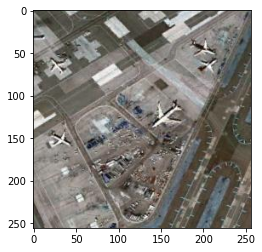

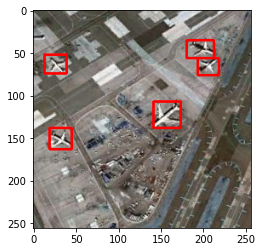

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
          x1 = int(row[1][0].split(" ")[0])
          y1 = int(row[1][0].split(" ")[1])
          x2 = int(row[1][0].split(" ")[2])
          y2 = int(row[1][0].split(" ")[3])
          cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [ ]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

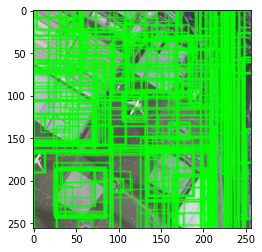

In [ ]:
im = cv2.imread(os.path.join(path,"42850.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [ ]:
train_images=[]
train_labels=[]

In [ ]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [ ]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_663.jpg
1 airplane_101.jpg
2 airplane_381.jpg
3 airplane_200.jpg
4 airplane_177.jpg
5 airplane_568.jpg
inside
6 airplane_241.jpg
7 airplane_189.jpg
8 airplane_310.jpg
9 airplane_639.jpg
10 airplane_409.jpg
11 airplane_283.jpg
12 airplane_624.jpg
inside
13 airplane_699.jpg
14 airplane_474.jpg
15 airplane_517.jpg
16 airplane_546.jpg
17 airplane_305.jpg
inside
18 airplane_029.jpg
19 airplane_516.jpg
20 airplane_118.jpg
21 airplane_264.jpg
inside
22 airplane_097.jpg
inside
23 airplane_661.jpg
24 airplane_235.jpg
25 airplane_635.jpg
26 airplane_451.jpg
27 airplane_258.jpg
29 airplane_559.jpg
30 airplane_013.jpg
31 airplane_148.jpg
33 airplane_677.jpg
34 airplane_207.jpg
35 airplane_169.jpg
36 airplane_132.jpg
37 airplane_369.jpg
38 airplane_015.jpg
39 airplane_697.jpg
40 airplane_205.jpg
41 airplane_633.jpg
42 airplane_673.jpg
44 airplane_685.jpg
45 airplane_515.jpg
46 airplane_227.jpg
47 airplane_319.jpg
48 airplane_497.jpg
inside
49 airplane_102.jpg
50 airplane_679.jpg
51 airpl

In [ ]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [ ]:
X_new.shape

(8303, 224, 224, 3)

In [ ]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [ ]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553467096/553467096 [==============================] - 26s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [ ]:
X= vggmodel.layers[-2].output

In [ ]:
predictions = Dense(2, activation="softmax")(X)

In [ ]:
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [ ]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [ ]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7472, 224, 224, 3) (831, 224, 224, 3) (7472, 2) (831, 2)


In [ ]:
hist=model_final.fit(X_train,y_train,epochs=10)

Epoch 1/10
234/234 [==============================] - 45s 192ms/step - loss: 0.0315 - accuracy: 0.9896
Epoch 2/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 3/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0398 - accuracy: 0.9868
Epoch 4/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0445 - accuracy: 0.9837
Epoch 5/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0272 - accuracy: 0.9885
Epoch 6/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0220 - accuracy: 0.9909
Epoch 7/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0239 - accuracy: 0.9905
Epoch 8/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0164 - accuracy: 0.9924
Epoch 9/10
234/234 [==============================] - 45s 191ms/step - loss: 0.0139 - accuracy: 0.9929
Epoch 10/10
234/234 [==============================] - 45s 191ms/step - l

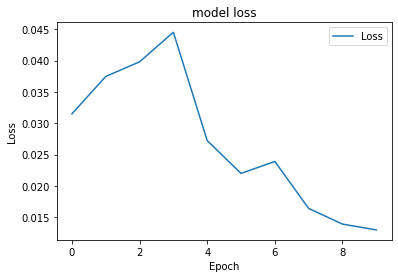

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
# plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

1/1 [==============================] - 0s 20ms/step
not plane


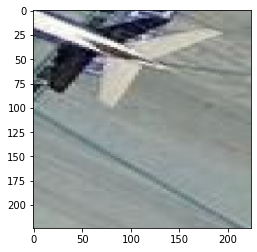

In [ ]:
im = X_test[199]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

1/1 [==============================] - 0s 15ms/step


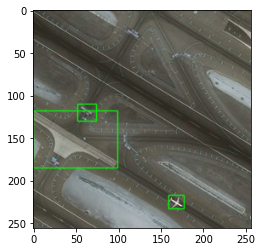

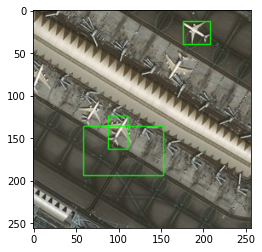

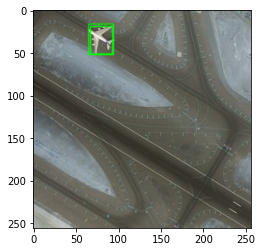

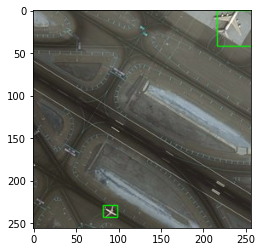

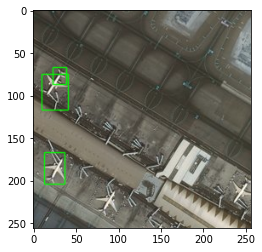

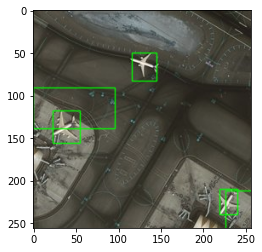

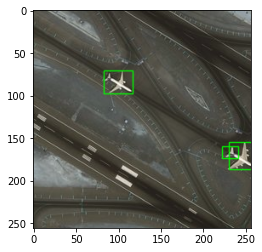

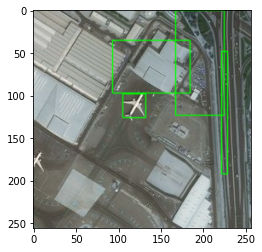

In [ ]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("4"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)